In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


**INTRODUCTION**

**WAHT IS CLUSTERING?**

* grouping of data based on similarities in a data set

**What is unsupervised learning**

* type of algorithm that learn patetrn from unlabeled data
we used KMeans algorithm here.

**application of clustering**
* customer segmentation
* market segmentation
* health and image processing
* cumputer vision



**Brief intro of KMeans**

1. select how many clusters will be used as a parameter form the user
2. k center points are randomly selected
3. each data point is assigned to the related cluster according to its nearest center point
4. the center points are shifted by calculating new center point for each cluster
5. after the new center points are determined, step 3 and 4 are repeated until the system stabilizes

**WCSS AND Elbow method**
* wcss (within cluster sum of squares) is the sum of squares of the distances of each data point in all clusters to their respective centroids

* the Elbow method is for finding optimal k value

**EXPLORATORY DATA ANALYSIS**

In [2]:
# import packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data_path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

In [4]:
df = pd.read_csv(data_path)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# ID is a unique number for each individuals, therefore we need to drop it
df.drop('CustomerID', axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


there is no null data

and data type of Gender is a object,

we need to convert it to numeric

In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


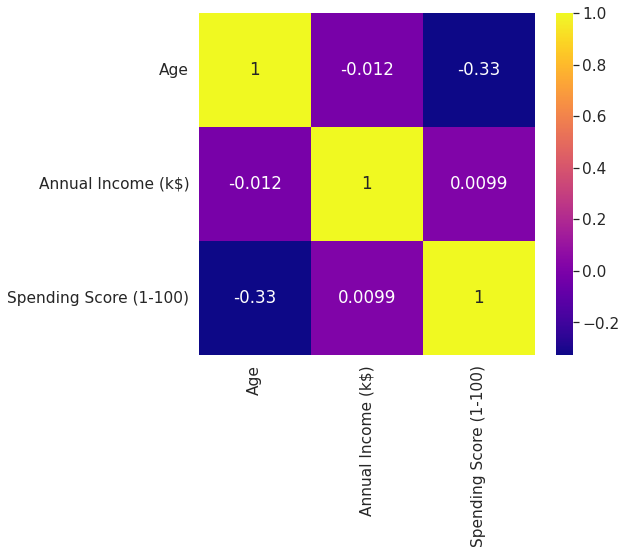

In [11]:
# correlations
cor = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

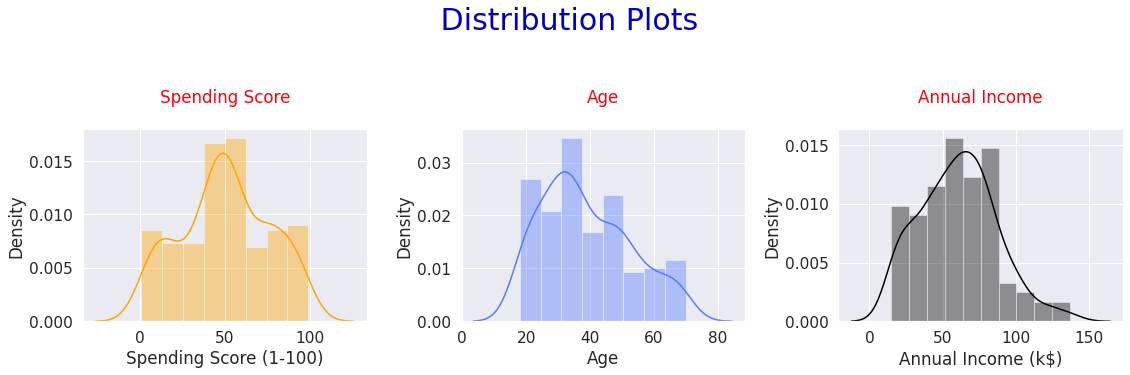

In [12]:
# distribution plots

plt.figure(figsize=(16,12),facecolor='white')

# spending score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color = '#FF000B')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# age 
plt.subplot(3,3,2)
plt.title('Age\n', color = '#FF000B')
sns.distplot(df['Age'], color='#577AFF')

#Annual Income
plt.subplot(3,3,3)
plt.title('Annual Income\n', color = '#FF000B')
sns.distplot(df['Annual Income (k$)'], color = 'black')

plt.suptitle(' Distribution Plots\n', color = '#0000C1', size = 30)
plt.tight_layout()


In [13]:
# label encodel for gender 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df.iloc[:,0])

In [14]:
# we concerted the 'Gender' column to numeric using the 'Label Encoder'
# Male = 1, Female = 0
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

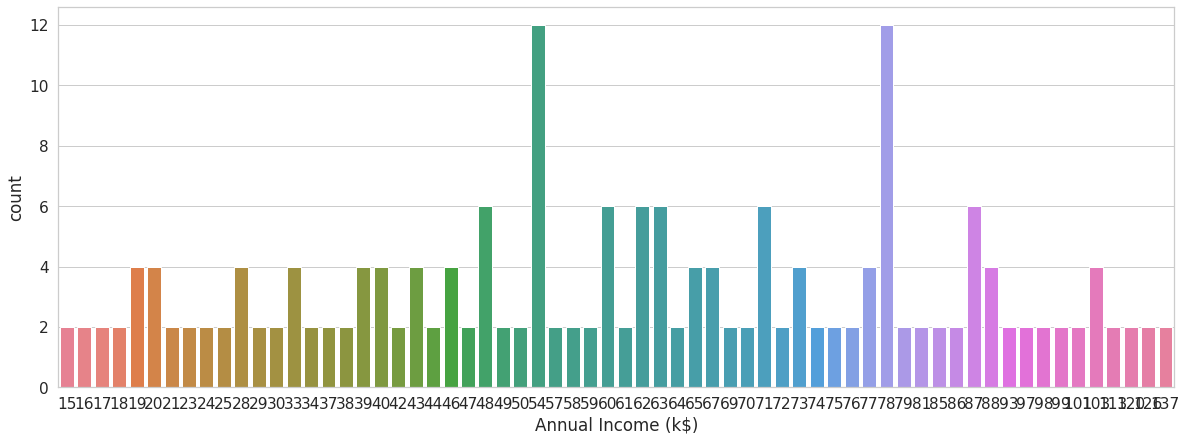

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income (k$)", data=df, palette='husl')

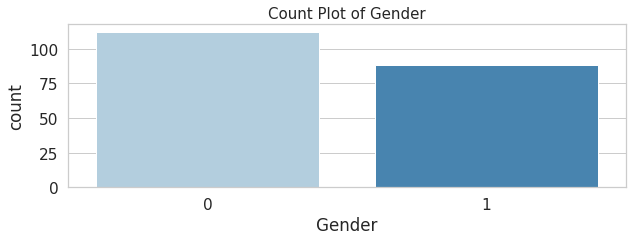

In [16]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(df['Gender'], palette = 'Blues')
plt.title('Count Plot of Gender', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Age - Spending Score')

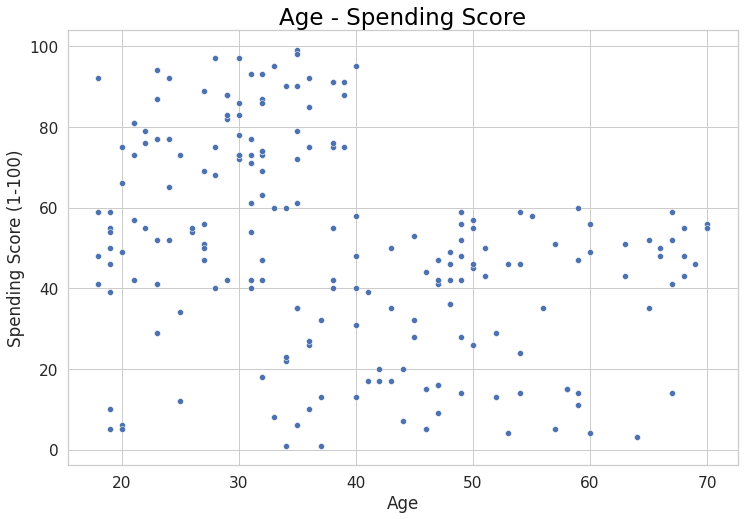

In [17]:
# relationship between age and spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 23, color = 'black')

**age(20-40) = area of max spendign score **

Text(0.5, 1.0, 'Annual Income - Spending Score')

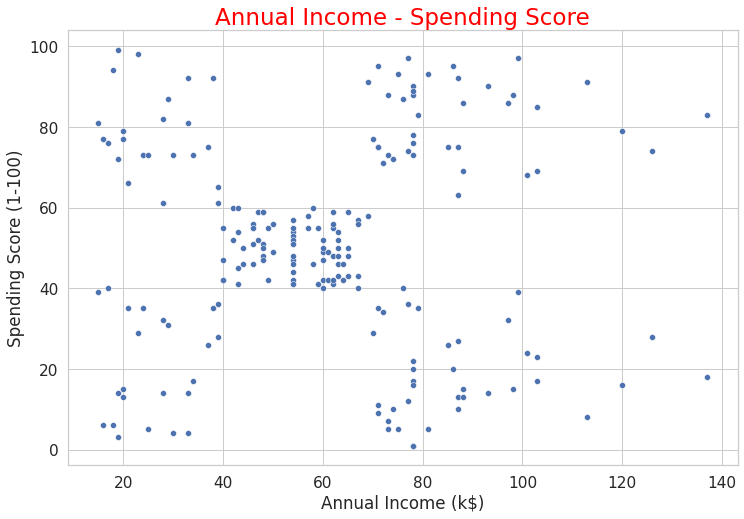

In [18]:
# relationship between annual income and spending score
plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color = 'red')

**CLustering 4 variables**

**PCA**

**clustering with 4 variables, I reduce the size, because after the clustering, I may have trouble in 4D visualization while visualizing. I will do the dimension reduction with PCA, we have a dataset with 4 columns, we want to make it as many columns as we want,reduce it to 2 columns.**



In [19]:
x = df.iloc[:,0:].values
print(f'X data before PCA:\n {x[0:5]}')

X data before PCA:
 [[ 1 19 15 39]
 [ 1 21 15 81]
 [ 0 20 16  6]
 [ 0 23 16 77]
 [ 0 31 17 40]]


In [20]:
#dff = pd.DataFrame({'A':[1,2,3],
#                   'B':[4,5,6],
#                   'C':[7,8,9],
#                   'D':[1,3,5],
#                   'E':[5,3,6],
#                   'F':[7,4,3]})

In [21]:
#print(dff)

In [22]:
#print(dff.iloc[:, :-1])

In [23]:
#X = dff.iloc[:,0:].values
#print (X)

In [24]:
# standardization before PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [25]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2D = pca.fit_transform(X)
print(f'\nX data after PCA:\n {X_2D[0:5,:]}')


X data after PCA:
 [[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]


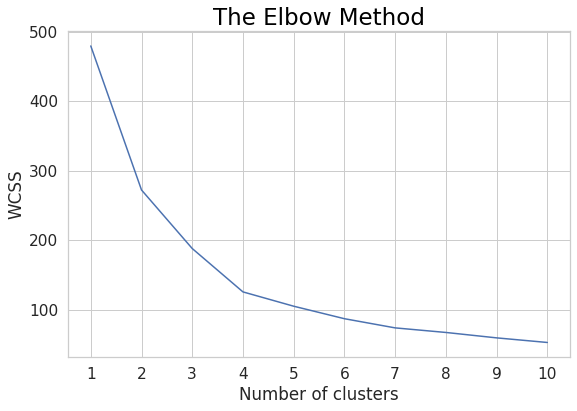

In [26]:
# finding optimum number of clusters
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

    

4 is optimum numebr of clusters

In [27]:
# KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

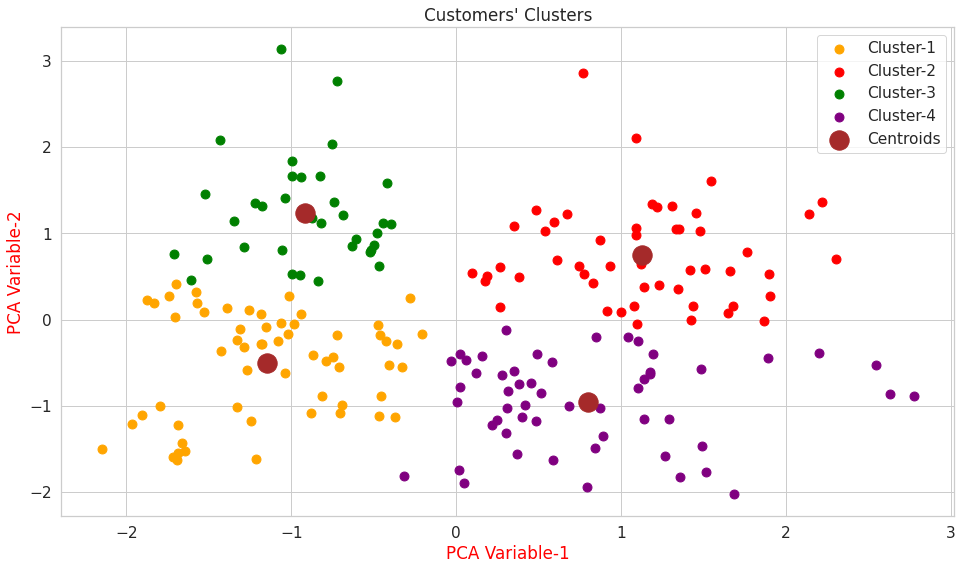

In [28]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()

**Clustering Age and annual Income and Speding score**

In [29]:
# x assignment
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
x_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']] # this line for 3d scatter plot

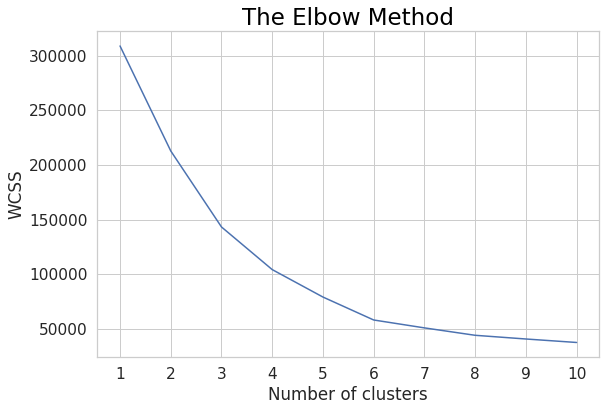

In [30]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [31]:
# KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
clusters = kmeans.fit_predict(x_df)
x_df['label'] = clusters

In [32]:
# # clusters visualization
fig = px.scatter_3d(data_frame=x_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'label', size = 'label')
fig.show()

**Clustering (Age and annual income)**

In [33]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

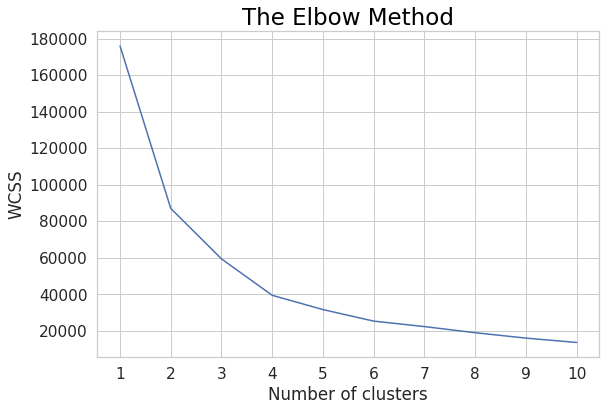

In [34]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [35]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

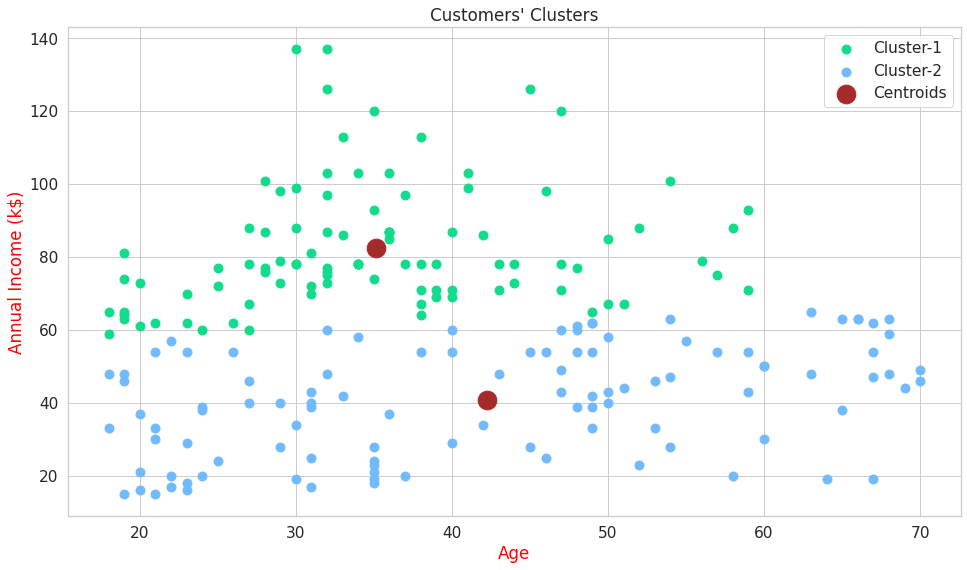

In [36]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='red')
plt.legend()
plt.show()

**Clustering by Annual Income and Spending Score**

In [37]:
# x assignment
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

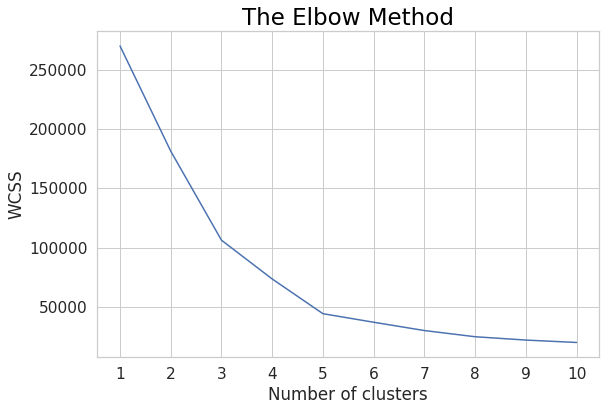

In [38]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

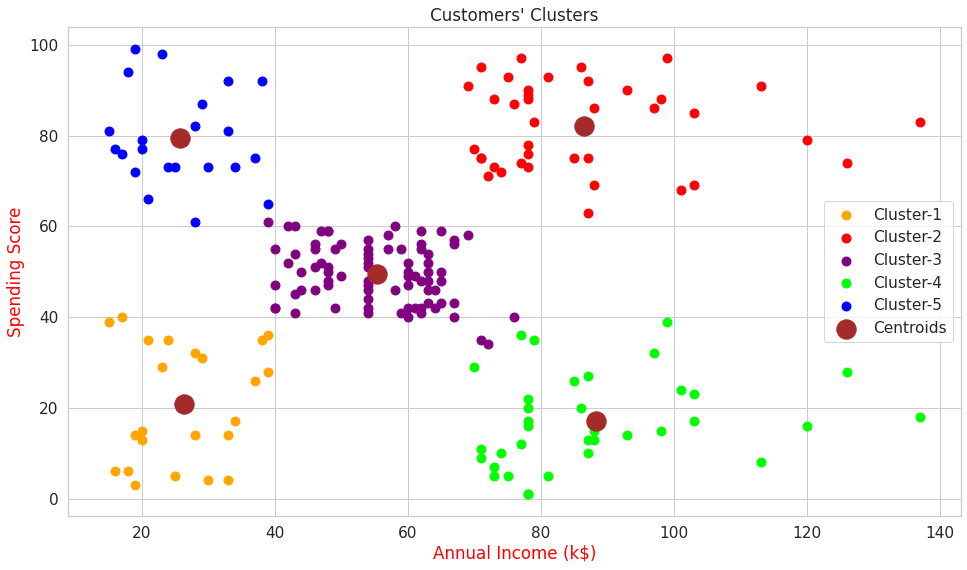

In [40]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

**Clustering by Age and Spending Score

In [41]:
# x assignment
x = df[['Age','Spending Score (1-100)']].values

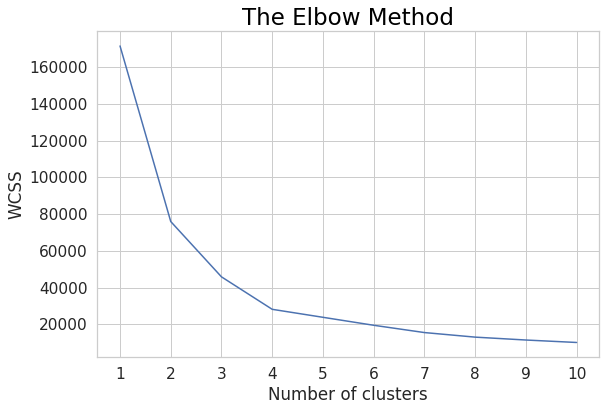

In [42]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='black',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [43]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

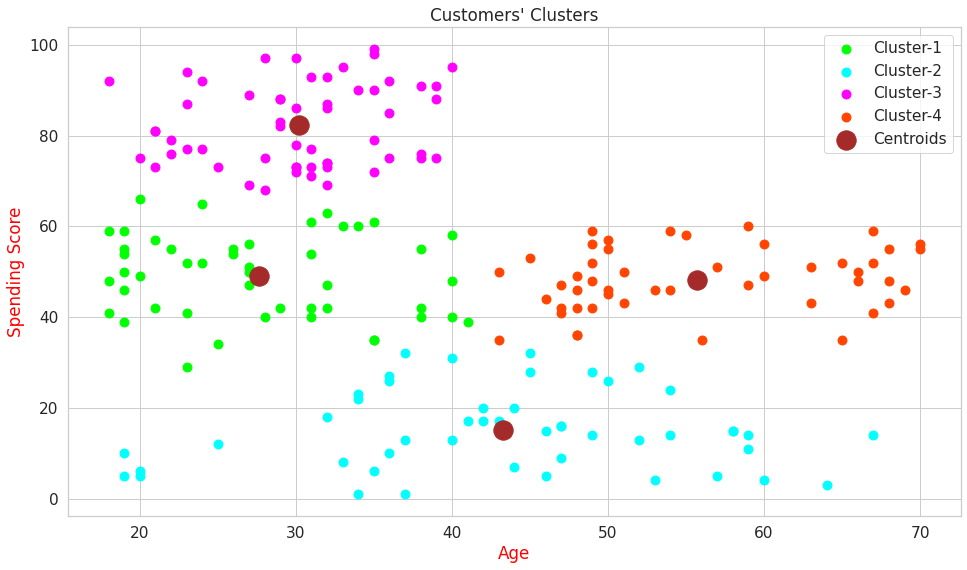

In [44]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#00FF00', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#00FFFF', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = '#FF4500', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()